https://lp-tech.net/articles/SSUMl


2017年11月30日 更新
# Pythonを使ったずれ補正
プログラミング言語，pythonを用いて画像のずれ補正を行いました．

# ズレ補正を行う画像
今回は，a.png を基準とした際，b.png および c.png のズレを求め，補正するという操作を行います．処理の内容を説明すると，  

①OpenCVで画像をグレースケールにて取得，  
②cv2.phaseCorrelate を用いて，位相限定相関を計算し，ズレを計算する，  
③cv2.warpAffine を用いて，ズレの分だけ画像を移動する，  

となります．実装は以下に記載しています．  


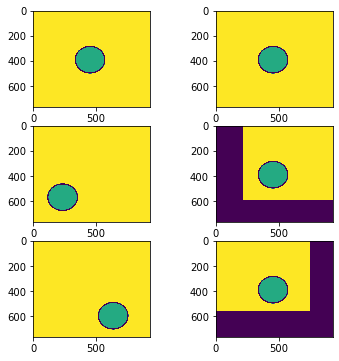

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

filename_li = ["a.png", "b.png", "c.png"]
img_li = []
for i in filename_li:
    img = cv2.imread(i, 0)    # 第二引数を 0 にすることでグレースケールで読み込む
    img_float = np.float32(img)    # cv2.phaseCorrelate で指定されている型に変換
    img_li.append(img_float)
    

dxdy_li = []
for img in img_li[1:]:
    d, etc = cv2.phaseCorrelate(img, img_li[0])    # d にx方向およびy方向のズレが格納されている
    dx, dy = d
    dxdy_li.append([dx, dy])
    
rows, cols = img_li[0].shape
img_after_li = [img_li[0]]
for dxdy, img in zip(dxdy_li, img_li[1:]):
    dx, dy = dxdy
    M = np.float32([[1, 0, dx],[0, 1, dy]])
    img = cv2.warpAffine(img, M, (cols,rows))
    img_after_li.append(img)
    
fig = plt.figure(figsize = (6, 6))    

subplot_li = [321, 323, 325]
for subplot, img in zip(subplot_li, img_li):
    ax = fig.add_subplot(subplot)
    ax.imshow(img)

subplot_after_li = [322, 324, 326]
for subplot_after, img_after in zip(subplot_after_li, img_after_li):
    ax = fig.add_subplot(subplot_after)
    ax.imshow(img_after)

plt.savefig('test.png', format = 'png', dpi=300)
plt.show()

# 処理前後の画像
結果として，このような画像が得られます．円が画像の中心に移動していることが分かります．この手法は，今回のような簡単な図以外でも使用できるので，興味がある方はぜひ挑戦してみて下さい．